### Data Wrangling

In [16]:
# all modules
import warnings
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn

### 1. Retrieve data

In [3]:
path = '../data/raw/'
data_raw = pd.read_csv(f'{path}data_raw.csv')
data_country = pd.read_csv(f'{path}data_countries_api.csv')
data_jobs = pd.read_csv(f'{path}data_jobs_api.csv')
country_info =pd.read_csv(f'{path}country_info.csv')

print(f'Data raw shape: {data_raw.shape}\n\
Data country shape: {data_country.shape}\n\
Data jobs shape: {data_jobs.shape}\n\
Country info shape: {country_info.shape}')

Data raw shape: (9649, 19)
Data country shape: (28, 4)
Data jobs shape: (157, 4)
Country info shape: (9649, 4)


In [8]:
df_stats = pd.DataFrame()
for (df_name,df) in {'data_raw':data_raw, 'data_country':data_country, 'data_jobs':data_jobs, 'country_info':country_info}.items():
    total_nulls= df.isnull().sum().sum()
    df_stats.loc[df_name, 'total_nulls'] = total_nulls
    df_stats.loc[df_name, 'total_columns'] = df.shape[1]
    df_stats.loc[df_name, 'total_rows'] = df.shape[0]

In [9]:
df_stats

,total_nulls,total_columns,total_rows
data_raw,4610.0,19.0,9649.0
data_country,0.0,4.0,28.0
data_jobs,3.0,4.0,157.0
country_info,0.0,4.0,9649.0


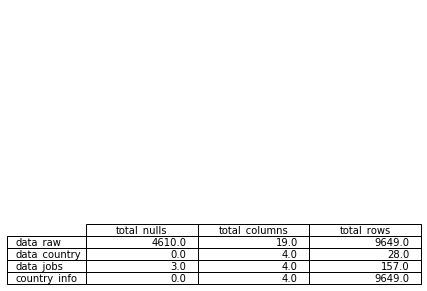

In [15]:
ax = plt.subplot(111, frame_on=False)  # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df_stats)  # where df is your data frame

plt.savefig('df_stats.png')

In [3]:
data_raw.head(3)
# data_raw.shape

,Unnamed: 0,uuid,dem_education_level,dem_full_time_job,normalized_job_code,uuid.1,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,uuid.2,country_code,rural,uuid.3,age,gender,dem_has_children,age_group
0,0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,NaN,f6e7ee00-deac-0133-4de8-0a81e8b09a82,I know something about it,I would not vote,None of the above,None of the above,None of the above,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,countryside,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61 years old,male,NO,40_65
1,1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0,54f0f1c0-dda1-0133-a559-0a81e8b09a82,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,urban,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57 years old,male,yES,40_65
2,2,83127080-da3d-0133-c74f-0a81e8b09a82,NaN,no,NaN,83127080-da3d-0133-c74f-0a81e8b09a82,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,83127080-da3d-0133-c74f-0a81e8b09a82,AT,city,83127080-da3d-0133-c74f-0a81e8b09a82,32 years old,male,nO,26_39


In [20]:
path2 = '../data/results/'
def save_df_as_image(df_stats, path2):
    source = ColumnDataSource(df_stats)
    df_columns = [df_stats.index.name]
    df_columns.extend(df_stats.columns.values)
    columns_for_table=[]
    for column in df_columns:
        columns_for_table.append(TableColumn(field=column, title=column))

    data_table = DataTable(source=source, columns=columns_for_table,height_policy="auto",width_policy="auto",index_position=None)
    export_png(data_table, filename = path2)

In [21]:
data_raw.drop(['Unnamed: 0','uuid.1', 'uuid.2','uuid.3'], axis = 1, inplace=True) 
# data = data_raw.loc[:,~data_raw.columns.duplicated()]
data_raw.head()

,uuid,dem_education_level,dem_full_time_job,normalized_job_code,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,country_code,rural,age,gender,dem_has_children,age_group
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,NaN,I know something about it,I would not vote,None of the above,None of the above,None of the above,AT,countryside,61 years old,male,NO,40_65
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,AT,urban,57 years old,male,yES,40_65
2,83127080-da3d-0133-c74f-0a81e8b09a82,NaN,no,NaN,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,AT,city,32 years old,male,nO,26_39
3,15626d40-db13-0133-ea5c-0a81e8b09a82,high,yes,049a3f3a2b5f85cb2971ba77ad66e10c,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,AT,Country,45 years old,Male,YES,40_65
4,24954a70-db98-0133-4a64-0a81e8b09a82,high,yes,f4b2fb1aa40f661488e2782b6d57ad2f,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,AT,city,41 years old,Fem,yES,40_65


In [5]:
data_raw.shape

(9649, 15)

In [6]:
data_jobs.head(3)

,Unnamed: 0,normalized_job_code,title,normalized_job_title
0,0,NaN,NaN,NaN
1,1,861a9b9151e11362eb3c77ca914172d0,Automatic Data Processing Planner,automatic data processing planner
2,2,049a3f3a2b5f85cb2971ba77ad66e10c,Data Coordinator,data coordinator


In [7]:
country_info.head(3)

,Unnamed: 0,uuid,country_code,rural
0,0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,countryside
1,1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,urban
2,2,83127080-da3d-0133-c74f-0a81e8b09a82,AT,city


In [8]:
data_country.head()

,Unnamed: 0,country_name,country_code,country_code2
0,0,Austria,AT,AUT
1,1,Belgium,BE,BEL
2,2,Bulgaria,BG,BGR
3,3,Cyprus,CY,CYP
4,4,Czech Republic,CZ,CZE


### 2. Merge databases

Variables needed: <br>
1. Country: We need to take the uuid from data_raw - left join with country_info and data_countries_api to get Country Name. 
2. Job Title: 
3. Gender: Needs to be cleaned (i.e. Male/ male) 
4. Quantity: Data Analysis  - Cals after 
5. Percentage: Data Analysis  - Cals after 

In [9]:
# country_info on 'uuid': country_code
# data_jobs on 'normalized_job_code': title
# data_raw
df = pd.merge(data_raw,data_country[['country_code','country_name']],on='country_code', how='left')

In [10]:
df.head(2)

,uuid,dem_education_level,dem_full_time_job,normalized_job_code,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,country_code,rural,age,gender,dem_has_children,age_group,country_name
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,NaN,I know something about it,I would not vote,None of the above,None of the above,None of the above,AT,countryside,61 years old,male,NO,40_65,Austria
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,AT,urban,57 years old,male,yES,40_65,Austria


In [11]:
df_all = pd.merge(df,data_jobs[['normalized_job_code','title']],on='normalized_job_code', how='left')

In [15]:
df_all.head(3)

,uuid,dem_education_level,dem_full_time_job,normalized_job_code,basic_income_awareness,basic_income_vote,basic_income_effect,basic_income_arguments_for,basic_income_arguments_against,country_code,rural,age,Gender,dem_has_children,age_group,Country,Job Title
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,NaN,I know something about it,I would not vote,None of the above,None of the above,None of the above,AT,countryside,61 years old,male,NO,40_65,Austria,NaN
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,AT,urban,57 years old,male,yES,40_65,Austria,Automatic Data Processing Planner
2,83127080-da3d-0133-c74f-0a81e8b09a82,NaN,no,NaN,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,AT,city,32 years old,male,nO,26_39,Austria,NaN


In [13]:
df_all.rename(columns = {'country_name':'Country','title':'Job Title', 'gender':'Gender',
                            'question_bbi_2016wave4_basicincome_awareness': 'basic_income_awareness',
                            'question_bbi_2016wave4_basicincome_vote':'basic_income_vote',
                            'question_bbi_2016wave4_basicincome_effect': 'basic_income_effect',
                            'question_bbi_2016wave4_basicincome_argumentsfor':'basic_income_arguments_for',
                            'question_bbi_2016wave4_basicincome_argumentsagainst':'basic_income_arguments_against'}, inplace=True)

In [14]:
df_all.head(2)

,uuid,dem_education_level,dem_full_time_job,normalized_job_code,basic_income_awareness,basic_income_vote,basic_income_effect,basic_income_arguments_for,basic_income_arguments_against,country_code,rural,age,Gender,dem_has_children,age_group,Country,Job Title
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,NaN,I know something about it,I would not vote,None of the above,None of the above,None of the above,AT,countryside,61 years old,male,NO,40_65,Austria,NaN
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,AT,urban,57 years old,male,yES,40_65,Austria,Automatic Data Processing Planner


####  1.1. Clean Gender

In [21]:
def clean_gender(x):
    lower = x.lower()
    if lower == 'fem':
        xf = lower.replace('fem','female')
        return xf
    else:
        return lower
    
df_all['Gender'] = df_all['Gender'].apply(clean_gender).apply(lambda x: x.lower().capitalize())
df_all.head(10)

,uuid,dem_education_level,dem_full_time_job,normalized_job_code,basic_income_awareness,basic_income_vote,basic_income_effect,basic_income_arguments_for,basic_income_arguments_against,country_code,rural,age,Gender,dem_has_children,age_group,Country,Job Title
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,NaN,I know something about it,I would not vote,None of the above,None of the above,None of the above,AT,countryside,61 years old,Male,NO,40_65,Austria,NaN
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,AT,urban,57 years old,Male,yES,40_65,Austria,Automatic Data Processing Planner
2,83127080-da3d-0133-c74f-0a81e8b09a82,NaN,no,NaN,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,AT,city,32 years old,Male,nO,26_39,Austria,NaN
3,15626d40-db13-0133-ea5c-0a81e8b09a82,high,yes,049a3f3a2b5f85cb2971ba77ad66e10c,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,AT,Country,45 years old,Male,YES,40_65,Austria,Data Coordinator
4,24954a70-db98-0133-4a64-0a81e8b09a82,high,yes,f4b2fb1aa40f661488e2782b6d57ad2f,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,AT,city,41 years old,Female,yES,40_65,Austria,Database Developer
5,28583060-dbe2-0133-ff9c-0a81e8b09a82,high,yes,27af8700f5577cec835acee2cb90a2ff,I understand it fully,I would vote against it,A basic income would not affect my work choices,It encourages financial independence and self-...,It is impossible to finance | It might encoura...,AT,countryside,1990,Female,NO,26_39,Austria,Data Entry Specialist
6,b50dbb80-da53-0133-8956-0a81e8b09a82,medium,no,NaN,I know something about it,I would probably vote for it,‰Û_ work as a freelancer,It reduces anxiety about financing basic needs,Foreigners might come to my country and take a...,AT,urban,1990,Female,NO,26_39,Austria,NaN
7,dd743bb0-d9a5-0133-53b2-0a81e8b09a82,medium,yes,c1b670eba9ccb65e7c99f7da116d5b9c,I know something about it,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working | Fo...,AT,urban,47 years old,Male,NO,40_65,Austria,Database Architect
8,4fde2370-da48-0133-3a42-0a81e8b09a82,medium,yes,d71c4164c99a5f9bca773e755a72f40f,I have heard just a little about it,I would probably vote for it,None of the above,It creates more equality of opportunity | It r...,Foreigners might come to my country and take a...,AT,city,34 years old,Female,nO,26_39,Austria,Geographic Information Systems Database Admini...
9,9949c4c0-da5f-0133-c832-0a81e8b09a82,no,no,NaN,I understand it fully,I would vote for it,‰Û_ do more volunteering work,"It increases solidarity, because it is funded ...",Foreigners might come to my country and take a...,AT,urban,1994,Female,yES,juvenile,Austria,NaN


####  1.1. Country info

In [31]:
df_all['Country'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic',
       'Germany', 'Denmark', 'Estonia', 'Spain', 'Finland', 'France',
       'UK', 'Greece', 'Croatia', 'Hungary', 'Ireland', 'Italy',
       'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Netherlands',
       'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia'],
      dtype=object)

In [33]:
df_all["Country"].replace('United Kingdom of Great Britain and Northern Ireland', 'UK', inplace=True)
df_all.head(5)

,uuid,dem_education_level,dem_full_time_job,normalized_job_code,basic_income_awareness,basic_income_vote,basic_income_effect,basic_income_arguments_for,basic_income_arguments_against,country_code,rural,age,Gender,dem_has_children,age_group,Country,Job Title
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,NaN,I know something about it,I would not vote,None of the above,None of the above,None of the above,AT,countryside,61 years old,Male,NO,40_65,Austria,NaN
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,AT,urban,57 years old,Male,yES,40_65,Austria,Automatic Data Processing Planner
2,83127080-da3d-0133-c74f-0a81e8b09a82,NaN,no,NaN,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,AT,city,32 years old,Male,nO,26_39,Austria,NaN
3,15626d40-db13-0133-ea5c-0a81e8b09a82,high,yes,049a3f3a2b5f85cb2971ba77ad66e10c,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,AT,Country,45 years old,Male,YES,40_65,Austria,Data Coordinator
4,24954a70-db98-0133-4a64-0a81e8b09a82,high,yes,f4b2fb1aa40f661488e2782b6d57ad2f,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,AT,city,41 years old,Female,yES,40_65,Austria,Database Developer


In [41]:
# print(df_all['normalized_job_code'].unique())
df_all['normalized_job_code'].isnull().sum()
# nan: 3947

0

In [42]:
df_all["normalized_job_code"].fillna('none', inplace=True)

In [43]:
df_all

,uuid,dem_education_level,dem_full_time_job,normalized_job_code,basic_income_awareness,basic_income_vote,basic_income_effect,basic_income_arguments_for,basic_income_arguments_against,country_code,rural,age,Gender,dem_has_children,age_group,Country,Job Title
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,none,I know something about it,I would not vote,None of the above,None of the above,None of the above,AT,countryside,61 years old,Male,NO,40_65,Austria,NaN
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,AT,urban,57 years old,Male,yES,40_65,Austria,Automatic Data Processing Planner
2,83127080-da3d-0133-c74f-0a81e8b09a82,NaN,no,none,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,AT,city,32 years old,Male,nO,26_39,Austria,NaN
3,15626d40-db13-0133-ea5c-0a81e8b09a82,high,yes,049a3f3a2b5f85cb2971ba77ad66e10c,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,AT,Country,45 years old,Male,YES,40_65,Austria,Data Coordinator
4,24954a70-db98-0133-4a64-0a81e8b09a82,high,yes,f4b2fb1aa40f661488e2782b6d57ad2f,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,AT,city,41 years old,Female,yES,40_65,Austria,Database Developer
5,28583060-dbe2-0133-ff9c-0a81e8b09a82,high,yes,27af8700f5577cec835acee2cb90a2ff,I understand it fully,I would vote against it,A basic income would not affect my work choices,It encourages financial independence and self-...,It is impossible to finance | It might encoura...,AT,countryside,1990,Female,NO,26_39,Austria,Data Entry Specialist
6,b50dbb80-da53-0133-8956-0a81e8b09a82,medium,no,none,I know something about it,I would probably vote for it,‰Û_ work as a freelancer,It reduces anxiety about financing basic needs,Foreigners might come to my country and take a...,AT,urban,1990,Female,NO,26_39,Austria,NaN
7,dd743bb0-d9a5-0133-53b2-0a81e8b09a82,medium,yes,c1b670eba9ccb65e7c99f7da116d5b9c,I know something about it,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working | Fo...,AT,urban,47 years old,Male,NO,40_65,Austria,Database Architect
8,4fde2370-da48-0133-3a42-0a81e8b09a82,medium,yes,d71c4164c99a5f9bca773e755a72f40f,I have heard just a little about it,I would probably vote for it,None of the above,It creates more equality of opportunity | It r...,Foreigners might come to my country and take a...,AT,city,34 years old,Female,nO,26_39,Austria,Geographic Information Systems Database Admini...
9,9949c4c0-da5f-0133-c832-0a81e8b09a82,no,no,none,I understand it fully,I would vote for it,‰Û_ do more volunteering work,"It increases solidarity, because it is funded ...",Foreigners might come to my country and take a...,AT,urban,1994,Female,yES,juvenile,Austria,NaN


#### Save to CSV

In [44]:
# saving data
path = '../data/processed/'
df_all.to_csv(f'{path}data_processed.csv')